<div class="alert-info">
<span style="color:black">
<h2><strong><b>Feature Engineering:</b></strong></h2>
<p>Feature engineering refers to the process of creating new features or transforming existing features to make them more informative for the machine learning algorithms. It involves domain knowledge and crea tivity in extracting meaningful information from the data. Some common techniques used in feature engineering include impuatation, scaling ,encoding ..
</p>
<h2><strong><b>Feature Selection:</b></strong></h2>
<p>Feature selection involves choosing a subset of the most relevant features from the available set of features to improve model performance, reduce overfitting, and enhance interpretability. It helps in reducing dimensionality and computational complexity while retaining important information.
</p>

</span>
</div>

In [2]:
# Standard Libaries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [3]:
# Reading the data
d1 = pd.read_excel("Downloads/Item_details.xlsx")
d2 = pd.read_excel("Downloads/Store_details.xlsx")
d3 = pd.read_csv("Downloads/sales_data.csv")
d4 = pd.read_csv("Downloads/wastage_data.csv")

In [4]:
# Merging the data
data1 = pd.merge(d3,d4,on=["Location_ID","Product_ID","Transaction_Date"])
data2 = pd.merge(data1,d1,on=["Product_ID"])
df= pd.merge(data2,d2,on=['Location_ID'])
df = df[df['Location_ID']==202]

In [5]:
df.drop(["City","TotalArea_SqFt","City","Address","Location_ID","Store_Name"],axis=1,inplace = True)

In [6]:
df.head()

Product_ID Transaction_Date  Sales_Value  Qty_Sold  Total_Transactions  \
0      100701       2017-06-16         44.1       1.0               397.0   
1      100701       2017-06-17         49.0       1.0              1275.0   
2      100701       2017-06-18         93.1       2.0              1165.0   
3      100701       2017-06-20          0.0       0.0               389.0   
4      100701       2017-06-26          0.0       0.0               780.0   

   Wastage_QTY  Wastage_Value  Product_Description Category Seasonality  \
0          0.0            0.0  Almond Fresh Punnet    Fruit    Seasonal   
1          0.0            0.0  Almond Fresh Punnet    Fruit    Seasonal   
2          0.0            0.0  Almond Fresh Punnet    Fruit    Seasonal   
3         -4.0         -152.0  Almond Fresh Punnet    Fruit    Seasonal   
4         -1.0          -38.0  Almond Fresh Punnet    Fruit    Seasonal   

  SubCategory  Shelf Life in days  
0      Almond                  10  
1      Almond                  10  
2      Almond                  10  
3      Almond                  10  
4      Almond                  10

## Seasonal Data - Feature Engineering

In [7]:
# Extracting Seasonal data from the original data
s_df = df[df['Seasonality']=='Seasonal']
s_df = s_df.drop(["Seasonality"],axis =1)

In [8]:
s_df.index = pd.to_datetime(s_df['Transaction_Date'])

In [9]:
# Viewing top 5 rows of the data
s_df.head()

Product_ID Transaction_Date  Sales_Value  Qty_Sold  \
Transaction_Date                                                       
2017-06-16            100701       2017-06-16         44.1       1.0   
2017-06-17            100701       2017-06-17         49.0       1.0   
2017-06-18            100701       2017-06-18         93.1       2.0   
2017-06-20            100701       2017-06-20          0.0       0.0   
2017-06-26            100701       2017-06-26          0.0       0.0   

                  Total_Transactions  Wastage_QTY  Wastage_Value  \
Transaction_Date                                                   
2017-06-16                     397.0          0.0            0.0   
2017-06-17                    1275.0          0.0            0.0   
2017-06-18                    1165.0          0.0            0.0   
2017-06-20                     389.0         -4.0         -152.0   
2017-06-26                     780.0         -1.0          -38.0   

                  Product_Description Category SubCategory  Shelf Life in days  
Transaction_Date                                                                
2017-06-16        Almond Fresh Punnet    Fruit      Almond                  10  
2017-06-17        Almond Fresh Punnet    Fruit      Almond                  10  
2017-06-18        Almond Fresh Punnet    Fruit      Almond                  10  
2017-06-20        Almond Fresh Punnet    Fruit      Almond                  10  
2017-06-26        Almond Fresh Punnet    Fruit      Almond                  10

In [10]:
s_df.tail()

Product_ID Transaction_Date  Sales_Value  Qty_Sold  \
Transaction_Date                                                       
2019-12-27            101138       2019-12-27        828.0      12.0   
2019-12-28            101138       2019-12-28      12504.7     212.0   
2019-12-29            101138       2019-12-29      11680.9     198.0   
2019-12-30            101138       2019-12-30        897.0      13.0   
2019-12-31            101138       2019-12-31        759.0      11.0   

                  Total_Transactions  Wastage_QTY  Wastage_Value  \
Transaction_Date                                                   
2019-12-27                     345.0          0.0         0.0000   
2019-12-28                     755.0          0.0         0.0000   
2019-12-29                     798.0        -21.0      -917.1141   
2019-12-30                     385.0        -35.0     -1532.7585   
2019-12-31                     463.0         -9.0      -403.2432   

                 Product_Description Category SubCategory  Shelf Life in days  
Transaction_Date                                                               
2019-12-27           Strawberry Pack    Fruit  Strawberry                   5  
2019-12-28           Strawberry Pack    Fruit  Strawberry                   5  
2019-12-29           Strawberry Pack    Fruit  Strawberry                   5  
2019-12-30           Strawberry Pack    Fruit  Strawberry                   5  
2019-12-31           Strawberry Pack    Fruit  Strawberry                   5

In [11]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37245 entries, 2017-06-16 to 2019-12-31
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           37245 non-null  int64  
 1   Transaction_Date     37245 non-null  object 
 2   Sales_Value          37245 non-null  float64
 3   Qty_Sold             37245 non-null  float64
 4   Total_Transactions   37245 non-null  float64
 5   Wastage_QTY          37245 non-null  float64
 6   Wastage_Value        37245 non-null  float64
 7   Product_Description  37245 non-null  object 
 8   Category             37245 non-null  object 
 9   SubCategory          37245 non-null  object 
 10  Shelf Life in days   37245 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.4+ MB


In [12]:
#checking null values in the seasonal dataset
s_df.isnull().sum()

Product_ID             0
Transaction_Date       0
Sales_Value            0
Qty_Sold               0
Total_Transactions     0
Wastage_QTY            0
Wastage_Value          0
Product_Description    0
Category               0
SubCategory            0
Shelf Life in days     0
dtype: int64

In [13]:
# information of the seasonal dataset
s_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37245 entries, 2017-06-16 to 2019-12-31
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           37245 non-null  int64  
 1   Transaction_Date     37245 non-null  object 
 2   Sales_Value          37245 non-null  float64
 3   Qty_Sold             37245 non-null  float64
 4   Total_Transactions   37245 non-null  float64
 5   Wastage_QTY          37245 non-null  float64
 6   Wastage_Value        37245 non-null  float64
 7   Product_Description  37245 non-null  object 
 8   Category             37245 non-null  object 
 9   SubCategory          37245 non-null  object 
 10  Shelf Life in days   37245 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.4+ MB


In [14]:
# Convert the date column to datetime data type
s_df["Transaction_Date"] = pd.to_datetime(s_df["Transaction_Date"])


s_df["Day"] = s_df["Transaction_Date"].dt.day

In [15]:
s_df.head()

Product_ID Transaction_Date  Sales_Value  Qty_Sold  \
Transaction_Date                                                       
2017-06-16            100701       2017-06-16         44.1       1.0   
2017-06-17            100701       2017-06-17         49.0       1.0   
2017-06-18            100701       2017-06-18         93.1       2.0   
2017-06-20            100701       2017-06-20          0.0       0.0   
2017-06-26            100701       2017-06-26          0.0       0.0   

                  Total_Transactions  Wastage_QTY  Wastage_Value  \
Transaction_Date                                                   
2017-06-16                     397.0          0.0            0.0   
2017-06-17                    1275.0          0.0            0.0   
2017-06-18                    1165.0          0.0            0.0   
2017-06-20                     389.0         -4.0         -152.0   
2017-06-26                     780.0         -1.0          -38.0   

                  Product_Description Category SubCategory  \
Transaction_Date                                             
2017-06-16        Almond Fresh Punnet    Fruit      Almond   
2017-06-17        Almond Fresh Punnet    Fruit      Almond   
2017-06-18        Almond Fresh Punnet    Fruit      Almond   
2017-06-20        Almond Fresh Punnet    Fruit      Almond   
2017-06-26        Almond Fresh Punnet    Fruit      Almond   

                  Shelf Life in days  Day  
Transaction_Date                           
2017-06-16                        10   16  
2017-06-17                        10   17  
2017-06-18                        10   18  
2017-06-20                        10   20  
2017-06-26                        10   26

In [16]:
# Month and Day of Week Features
s_df['month'] = s_df.index.month
s_df['day_of_week'] = s_df.index.dayofweek

In [17]:
s_df.head()

Product_ID Transaction_Date  Sales_Value  Qty_Sold  \
Transaction_Date                                                       
2017-06-16            100701       2017-06-16         44.1       1.0   
2017-06-17            100701       2017-06-17         49.0       1.0   
2017-06-18            100701       2017-06-18         93.1       2.0   
2017-06-20            100701       2017-06-20          0.0       0.0   
2017-06-26            100701       2017-06-26          0.0       0.0   

                  Total_Transactions  Wastage_QTY  Wastage_Value  \
Transaction_Date                                                   
2017-06-16                     397.0          0.0            0.0   
2017-06-17                    1275.0          0.0            0.0   
2017-06-18                    1165.0          0.0            0.0   
2017-06-20                     389.0         -4.0         -152.0   
2017-06-26                     780.0         -1.0          -38.0   

                  Product_Description Category SubCategory  \
Transaction_Date                                             
2017-06-16        Almond Fresh Punnet    Fruit      Almond   
2017-06-17        Almond Fresh Punnet    Fruit      Almond   
2017-06-18        Almond Fresh Punnet    Fruit      Almond   
2017-06-20        Almond Fresh Punnet    Fruit      Almond   
2017-06-26        Almond Fresh Punnet    Fruit      Almond   

                  Shelf Life in days  Day  month  day_of_week  
Transaction_Date                                               
2017-06-16                        10   16      6            4  
2017-06-17                        10   17      6            5  
2017-06-18                        10   18      6            6  
2017-06-20                        10   20      6            1  
2017-06-26                        10   26      6            0

In [18]:
# Assuming monthly data with 12 months in a year
for lag in range(1, 6):
    s_df[f'lag_{lag}_Qty'] = s_df['Qty_Sold'].shift(lag)

In [19]:
# Assuming monthly data with 12 months in a year
for lag in range(1, 6):
    s_df[f'lag_{lag}_Sales'] = s_df['Sales_Value'].shift(lag)

In [20]:
# Rolling Window Seasonal Statistics (e.g., 7-day rolling mean)
s_df['rolling_mean_Qty'] = s_df['Qty_Sold'].rolling(window=7).mean()
s_df['rolling_mean_Sales'] =s_df['Sales_Value'].rolling(window=7).mean()

In [21]:
# Seasonal Difference (e.g., monthly data)
s_df['Seasonal_Difference_Sales'] = s_df['Sales_Value'] - s_df['Sales_Value'].shift(12)
s_df['Seasonal_Difference_Qty'] = s_df['Qty_Sold'] - s_df['Qty_Sold'].shift(12)

In [22]:
# Seasonal Decomposition (using statsmodels library)-sales
import statsmodels.api as sm
seasonal_decomposition = sm.tsa.seasonal_decompose(s_df['Sales_Value'], model='additive', period=12)
s_df['Seasonal_Component_Sales'] = seasonal_decomposition.seasonal

In [23]:
# Seasonal Decomposition (using statsmodels library)-Qty
import statsmodels.api as sm
seasonal_decomposition = sm.tsa.seasonal_decompose(s_df['Qty_Sold'], model='additive', period=12)
s_df['Seasonal_Component_Qty'] = seasonal_decomposition.seasonal


In [24]:
monthly_sales_averages = s_df.groupby('month')['Sales_Value'].mean().reset_index()
monthly_sales_averages.rename(columns={'Sales_Value': 'Monthly_Sales_Average'}, inplace=True)
s_df = s_df.merge(monthly_sales_averages, on='month', how='left')

In [25]:
s_df.head()

Product_ID Transaction_Date  Sales_Value  Qty_Sold  Total_Transactions  \
0      100701       2017-06-16         44.1       1.0               397.0   
1      100701       2017-06-17         49.0       1.0              1275.0   
2      100701       2017-06-18         93.1       2.0              1165.0   
3      100701       2017-06-20          0.0       0.0               389.0   
4      100701       2017-06-26          0.0       0.0               780.0   

   Wastage_QTY  Wastage_Value  Product_Description Category SubCategory  ...  \
0          0.0            0.0  Almond Fresh Punnet    Fruit      Almond  ...   
1          0.0            0.0  Almond Fresh Punnet    Fruit      Almond  ...   
2          0.0            0.0  Almond Fresh Punnet    Fruit      Almond  ...   
3         -4.0         -152.0  Almond Fresh Punnet    Fruit      Almond  ...   
4         -1.0          -38.0  Almond Fresh Punnet    Fruit      Almond  ...   

   lag_3_Sales  lag_4_Sales  lag_5_Sales  rolling_mean_Qty  \
0          NaN          NaN          NaN               NaN   
1          NaN          NaN          NaN               NaN   
2          NaN          NaN          NaN               NaN   
3         44.1          NaN          NaN               NaN   
4         49.0         44.1          NaN               NaN   

   rolling_mean_Sales  Seasonal_Difference_Sales  Seasonal_Difference_Qty  \
0                 NaN                        NaN                      NaN   
1                 NaN                        NaN                      NaN   
2                 NaN                        NaN                      NaN   
3                 NaN                        NaN                      NaN   
4                 NaN                        NaN                      NaN   

   Seasonal_Component_Sales  Seasonal_Component_Qty  Monthly_Sales_Average  
0                 42.894025                0.681835            2904.095194  
1                 12.774473                0.266174            2904.095194  
2                 -5.415046               -0.278007            2904.095194  
3                 -6.236492                0.009590            2904.095194  
4                -31.896857               -0.594330            2904.095194  

[5 rows x 31 columns]

In [26]:
s_df.index =s_df['Transaction_Date']

In [27]:
s_df.drop(['Transaction_Date'],axis=1,inplace=True)

In [28]:
s_df.isnull().sum()

Product_ID                    0
Sales_Value                   0
Qty_Sold                      0
Total_Transactions            0
Wastage_QTY                   0
Wastage_Value                 0
Product_Description           0
Category                      0
SubCategory                   0
Shelf Life in days            0
Day                           0
month                         0
day_of_week                   0
lag_1_Qty                     1
lag_2_Qty                     2
lag_3_Qty                     3
lag_4_Qty                     4
lag_5_Qty                     5
lag_1_Sales                   1
lag_2_Sales                   2
lag_3_Sales                   3
lag_4_Sales                   4
lag_5_Sales                   5
rolling_mean_Qty              6
rolling_mean_Sales            6
Seasonal_Difference_Sales    12
Seasonal_Difference_Qty      12
Seasonal_Component_Sales      0
Seasonal_Component_Qty        0
Monthly_Sales_Average         0
dtype: int64

In [29]:
s_df.fillna(s_df.mean(), inplace=True)

In [30]:
s_df.isnull().sum()

Product_ID                   0
Sales_Value                  0
Qty_Sold                     0
Total_Transactions           0
Wastage_QTY                  0
Wastage_Value                0
Product_Description          0
Category                     0
SubCategory                  0
Shelf Life in days           0
Day                          0
month                        0
day_of_week                  0
lag_1_Qty                    0
lag_2_Qty                    0
lag_3_Qty                    0
lag_4_Qty                    0
lag_5_Qty                    0
lag_1_Sales                  0
lag_2_Sales                  0
lag_3_Sales                  0
lag_4_Sales                  0
lag_5_Sales                  0
rolling_mean_Qty             0
rolling_mean_Sales           0
Seasonal_Difference_Sales    0
Seasonal_Difference_Qty      0
Seasonal_Component_Sales     0
Seasonal_Component_Qty       0
Monthly_Sales_Average        0
dtype: int64

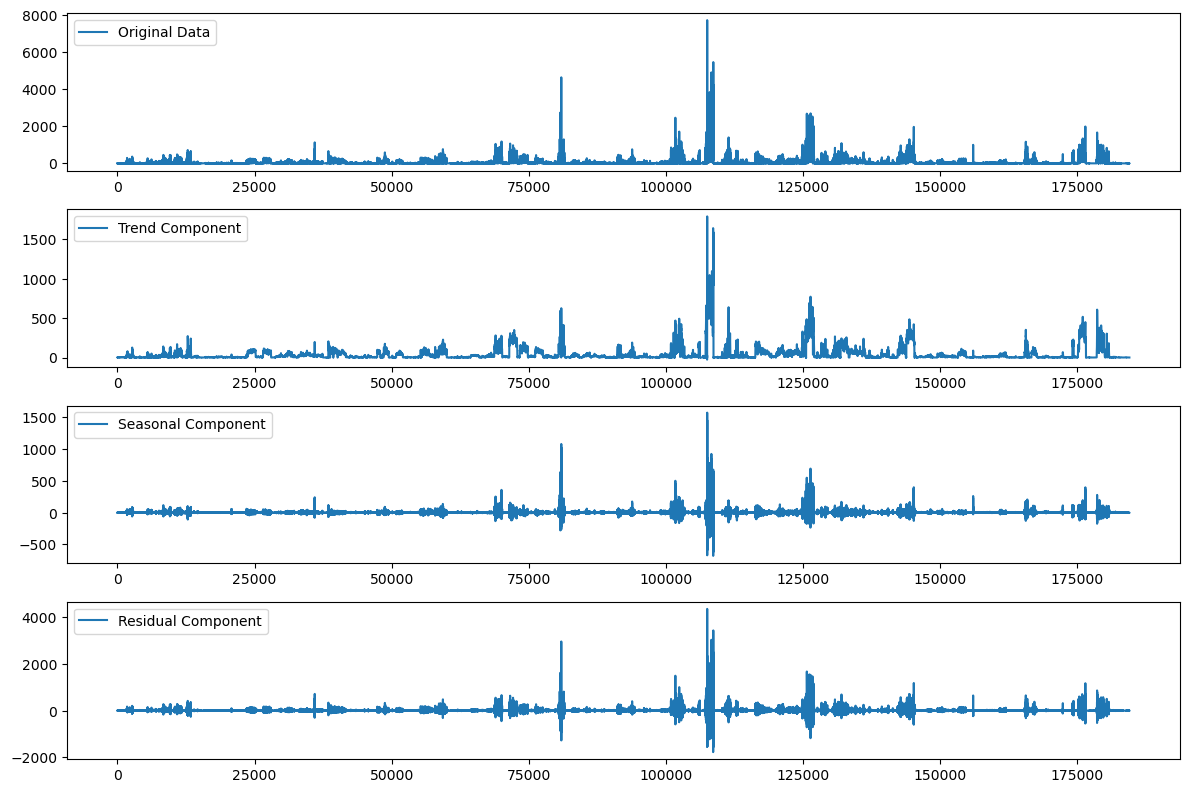

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
df1 = s_df

# Perform seasonal decomposition using STL
stl = STL(df['Qty_Sold'], period=12)
result = stl.fit()

# Extract the components from the result
seasonal = result.seasonal
trend = result.trend
residual = result.resid

# Plot the original data and the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Qty_Sold'], label='Original Data')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend Component')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal Component')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual Component')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Seasonal Data - Feature Selection

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression, SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

In [33]:
# Extract features and target variable
X = df.drop(['Qty_Sold'],axis=1)
y = df['Qty_Sold']

In [34]:
# 1. Correlation Analysis
correlations = s_df.corr()
print("Correlation matrix:")
correlations

Correlation matrix:


Product_ID  Sales_Value  Qty_Sold  \
Product_ID                   1.000000     0.025064  0.118880   
Sales_Value                  0.025064     1.000000  0.869112   
Qty_Sold                     0.118880     0.869112  1.000000   
Total_Transactions          -0.000469     0.305269  0.276118   
Wastage_QTY                 -0.066504    -0.101238 -0.135149   
Wastage_Value               -0.025345    -0.081767 -0.073119   
Shelf Life in days          -0.443068     0.080024  0.095151   
Day                          0.002782    -0.023771 -0.022674   
month                       -0.026382     0.000163 -0.024202   
day_of_week                  0.003992     0.283345  0.252887   
lag_1_Qty                    0.118858     0.473121  0.552004   
lag_2_Qty                    0.118836     0.166465  0.211225   
lag_3_Qty                    0.118705     0.322878  0.397406   
lag_4_Qty                    0.118565     0.316795  0.391845   
lag_5_Qty                    0.118544     0.160897  0.207914   
lag_1_Sales                  0.025042     0.556717  0.477298   
lag_2_Sales                  0.025018     0.203222  0.165956   
lag_3_Sales                  0.024911     0.367663  0.321853   
lag_4_Sales                  0.024795     0.363072  0.319515   
lag_5_Sales                  0.024773     0.196381  0.163019   
rolling_mean_Qty             0.172769     0.570237  0.679532   
rolling_mean_Sales           0.036580     0.670350  0.577972   
Seasonal_Difference_Sales    0.000450     0.637499  0.559814   
Seasonal_Difference_Qty      0.000589     0.565615  0.635532   
Seasonal_Component_Sales    -0.000087     0.006920  0.006167   
Seasonal_Component_Qty      -0.000092     0.006287  0.006805   
Monthly_Sales_Average        0.039116     0.030809  0.045123   

                           Total_Transactions  Wastage_QTY  Wastage_Value  \
Product_ID                          -0.000469    -0.066504      -0.025345   
Sales_Value                          0.305269    -0.101238      -0.081767   
Qty_Sold                             0.276118    -0.135149      -0.073119   
Total_Transactions                   1.000000    -0.026472      -0.020656   
Wastage_QTY                         -0.026472     1.000000       0.844697   
Wastage_Value                       -0.020656     0.844697       1.000000   
Shelf Life in days                   0.005359    -0.027643      -0.006115   
Day                                 -0.043310    -0.007562      -0.010426   
month                                0.098506     0.002715      -0.013873   
day_of_week                          0.622323     0.020383       0.014230   
lag_1_Qty                            0.069689    -0.180808      -0.100249   
lag_2_Qty                           -0.131427    -0.174523      -0.083661   
lag_3_Qty                           -0.039975    -0.125150      -0.052165   
lag_4_Qty                           -0.039019    -0.108816      -0.053411   
lag_5_Qty                           -0.132580    -0.113273      -0.060440   
lag_1_Sales                          0.074684    -0.138279      -0.109532   
lag_2_Sales                         -0.148658    -0.117596      -0.082573   
lag_3_Sales                         -0.050627    -0.076997      -0.047600   
lag_4_Sales                         -0.049935    -0.076521      -0.056963   
lag_5_Sales                         -0.146158    -0.082267      -0.067219   
rolling_mean_Qty                     0.009306    -0.197799      -0.099689   
rolling_mean_Sales                   0.007214    -0.141101      -0.106803   
Seasonal_Difference_Sales            0.340573    -0.008860      -0.006459   
Seasonal_Difference_Qty              0.309951    -0.010821      -0.005176   
Seasonal_Component_Sales             0.001587    -0.000808      -0.001520   
Seasonal_Component_Qty               0.000011     0.000276      -0.001093   
Monthly_Sales_Average                0.016515    -0.023104      -0.004766   

                           Shelf Life in days       Day     month  \
Product_

In [35]:
# 2. Identify highly correlated features
threshold = 0.9
highly_correlated_features = set()
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > threshold:
            colname_i = correlations.columns[i]
            colname_j = correlations.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)
highly_correlated_features

{'Seasonal_Component_Qty', 'Seasonal_Component_Sales'}

# Recursive Feature Selection(RFE) With Random Forest

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, mutual_info_classif

# Separate numerical and categorical features
numerical_features = s_df.select_dtypes(include=['int64', 'float64']).drop('Qty_Sold', axis=1)
categorical_features = s_df.select_dtypes(include=['object'])

# Numerical Feature Selection
X_numerical = numerical_features
y_numerical = s_df['Qty_Sold']

# Split the numerical data into training and testing sets
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numerical, y_numerical, test_size=0.2, random_state=42)

# Feature Importance from Models (Random Forest
rf_model_num = RandomForestRegressor(random_state=42)
rf_model_num.fit(X_train_num, y_train_num)
feature_importances_num = pd.Series(rf_model_num.feature_importances_, index=X_numerical.columns).sort_values(ascending=False)
print("Numerical Feature Importances from Random Forest:")
print(feature_importances_num)

# Recursive Feature Elimination (RFE) with Random Forest
selector_rfe_num = SelectFromModel(rf_model_num, prefit=True)
selected_features_rfe_num = X_numerical.columns[selector_rfe_num.get_support()]
print("Selected numerical features using RFE:")
print(selected_features_rfe_num)

Numerical Feature Importances from Random Forest:
Seasonal_Difference_Qty      0.842877
Sales_Value                  0.120109
rolling_mean_Qty             0.018384
rolling_mean_Sales           0.003064
Seasonal_Difference_Sales    0.002201
Total_Transactions           0.001724
lag_5_Qty                    0.001504
Product_ID                   0.001455
lag_5_Sales                  0.001177
lag_4_Qty                    0.000842
lag_1_Qty                    0.000651
lag_2_Qty                    0.000647
Day                          0.000590
lag_3_Qty                    0.000565
lag_3_Sales                  0.000500
lag_4_Sales                  0.000471
lag_2_Sales                  0.000450
day_of_week                  0.000443
lag_1_Sales                  0.000435
month                        0.000428
Wastage_QTY                  0.000392
Monthly_Sales_Average        0.000259
Wastage_Value                0.000259
Seasonal_Component_Sales     0.000200
Seasonal_Component_Qty       0.000190


# Variance Inflation Factor (VIF)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_result = calculate_vif(numerical_features)
print("VIF Results:")
print(vif_result)

VIF Results:
                      Feature         VIF
0                  Product_ID  258.110525
1                 Sales_Value   18.555377
2          Total_Transactions    6.039636
3                 Wastage_QTY    3.932102
4               Wastage_Value    3.746215
5          Shelf Life in days   24.112956
6                         Day    4.229665
7                       month    4.523490
8                 day_of_week    6.312919
9                   lag_1_Qty   20.742691
10                  lag_2_Qty   20.634157
11                  lag_3_Qty   30.107099
12                  lag_4_Qty   17.002723
13                  lag_5_Qty   41.595164
14                lag_1_Sales   22.503326
15                lag_2_Sales   26.493078
16                lag_3_Sales   35.242830
17                lag_4_Sales   19.011592
18                lag_5_Sales   47.848256
19           rolling_mean_Qty  140.813503
20         rolling_mean_Sales  223.544831
21  Seasonal_Difference_Sales   14.985504
22    Seasonal_Differ

In [38]:
# Filter features with VIF greater than 10 and less than 50,000
selected_features = vif_result[(vif_result['VIF'] > 20) & (vif_result['VIF'] < 50000)]

print("Selected Features with VIF > 10 and VIF < 50000:")
print(selected_features)


Selected Features with VIF > 10 and VIF < 50000:
                  Feature         VIF
0              Product_ID  258.110525
5      Shelf Life in days   24.112956
9               lag_1_Qty   20.742691
10              lag_2_Qty   20.634157
11              lag_3_Qty   30.107099
13              lag_5_Qty   41.595164
14            lag_1_Sales   22.503326
15            lag_2_Sales   26.493078
16            lag_3_Sales   35.242830
18            lag_5_Sales   47.848256
19       rolling_mean_Qty  140.813503
20     rolling_mean_Sales  223.544831
25  Monthly_Sales_Average  234.641460


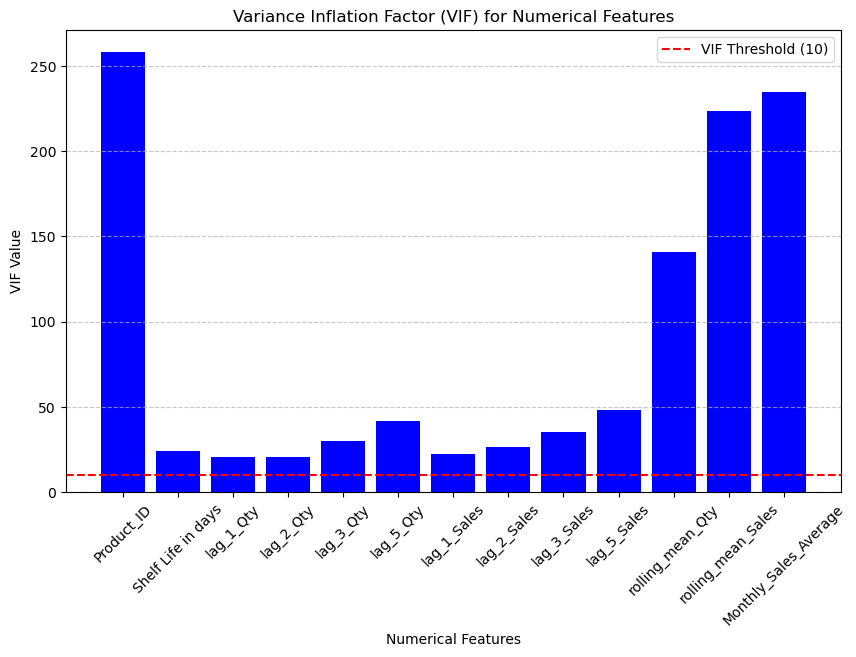

In [39]:
# Plot the VIF results
plt.figure(figsize=(10, 6))
plt.bar(selected_features["Feature"], selected_features["VIF"], color='blue')
plt.xlabel('Numerical Features')
plt.ylabel('VIF Value')
plt.title('Variance Inflation Factor (VIF) for Numerical Features')
plt.xticks(rotation=45)
plt.axhline(y=10, color='red', linestyle='--', label='VIF Threshold (10)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [40]:
s_df = s_df[["Sales_Value","rolling_mean_Qty","Seasonal_Difference_Qty","SubCategory","Qty_Sold"]]

In [41]:
s_df['SubCategory'].unique()

array(['Almond', 'Apple', 'Apricot', 'Carrot', 'Cherry', 'Fig', 'Grape',
       'Grapes', 'GreenPeas', 'Guava', 'JackFruit', 'Jamun', 'Litchi',
       'Mango', 'Mosambi', 'Orange', 'Peach', 'Pear', 'Pears', 'Plum',
       'Plums', 'Pomegranat', 'Pomegranate', 'PruneFruit', 'StarFruit',
       'Strawberry'], dtype=object)

In [42]:
# Given list of fruit names
fruits = s_df['SubCategory'].unique()
# Convert the list of fruit names into numbers
fruit_numbers = [index + 1 for index, fruit in enumerate(fruits)]

print(fruit_numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [43]:
fruits = s_df['SubCategory'].unique()
# Create a dictionary to map each fruit to a unique number starting from 1
fruit_mapping = {fruit: index + 1 for index, fruit in enumerate(fruits)}

In [44]:
s_df['SubCategory'] = s_df['SubCategory'].map(fruit_mapping)

In [45]:
s_df.head()

Sales_Value  rolling_mean_Qty  Seasonal_Difference_Qty  \
Transaction_Date                                                           
2017-06-16               44.1         28.732788                 0.032955   
2017-06-17               49.0         28.732788                 0.032955   
2017-06-18               93.1         28.732788                 0.032955   
2017-06-20                0.0         28.732788                 0.032955   
2017-06-26                0.0         28.732788                 0.032955   

                  SubCategory  Qty_Sold  
Transaction_Date                         
2017-06-16                  1       1.0  
2017-06-17                  1       1.0  
2017-06-18                  1       2.0  
2017-06-20                  1       0.0  
2017-06-26                  1       0.0

# Seasonal Data - Model Building & Model Evaluation

In [46]:
X = s_df.drop(["Qty_Sold"],axis = 1)
y = s_df['Qty_Sold']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<div class="alert-info">
<span style="color:black">
    <strong>Model Building:</strong> For time series data, build an SARIMA,LSTM model to capture temporal dependencies and forecast future values.

<strong>Model Evaluation:</strong> Evaluate the SARIMA model's performance using metrics like MSE (Mean Squared Error) , MAPE (Mean Absolute Percentage Error) and RMSE (Root Mean Squared Error) to assess forecasting accuracy.

</span>
</div>

# RandomForestRegressor

In [48]:
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [49]:
y_pred = model.predict(X)
y_pred

array([  0.89407 ,   0.93938 ,   1.70464 , ..., 205.514249,  15.182022,
        11.009755])

In [50]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
loss = mean_squared_error(y,y_pred)
print(f'mse: {loss/100}')
loss1 = mean_squared_log_error(y,y_pred)
print(f'msle :{loss1}')
print(f'rmse :{np.sqrt(loss/100)}')

mse: 0.11998112024848327
msle :0.007044292651121029
rmse :0.3463829098677983


# SARIMAX

Text(0.5, 1.0, 'Partial Autocorrelation Plot')

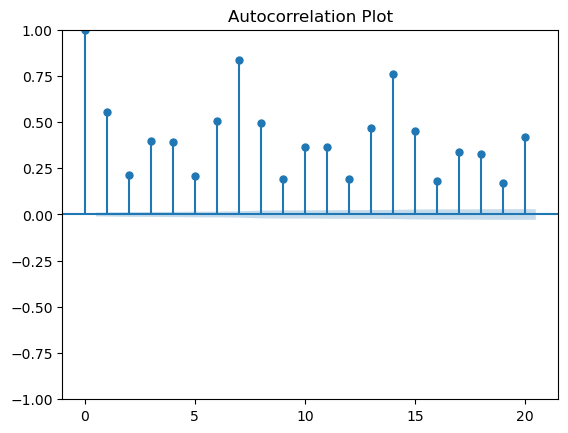

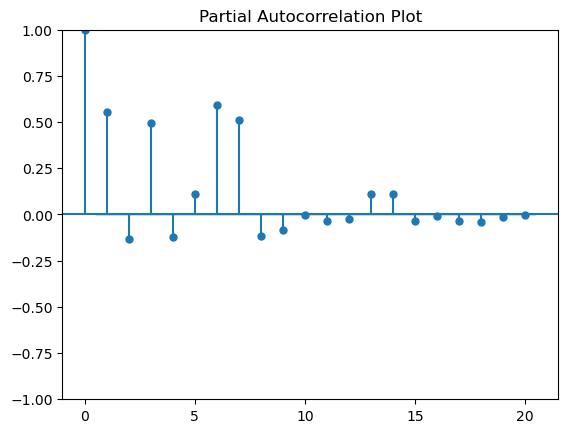

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(s_df["Qty_Sold"], lags= 20)
plt.title("Autocorrelation Plot")
plot_pacf(s_df["Qty_Sold"], lags = 20)
plt.title("Partial Autocorrelation Plot")

In [52]:
s_df.head()

Sales_Value  rolling_mean_Qty  Seasonal_Difference_Qty  \
Transaction_Date                                                           
2017-06-16               44.1         28.732788                 0.032955   
2017-06-17               49.0         28.732788                 0.032955   
2017-06-18               93.1         28.732788                 0.032955   
2017-06-20                0.0         28.732788                 0.032955   
2017-06-26                0.0         28.732788                 0.032955   

                  SubCategory  Qty_Sold  
Transaction_Date                         
2017-06-16                  1       1.0  
2017-06-17                  1       1.0  
2017-06-18                  1       2.0  
2017-06-20                  1       0.0  
2017-06-26                  1       0.0

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81000D+00    |proj g|=  2.05797D-01


 This problem is unconstrained.



At iterate    5    f=  5.58049D+00    |proj g|=  2.01985D-02

At iterate   10    f=  5.48219D+00    |proj g|=  3.71256D-02
  ys=-3.102E+00  -gs= 4.446E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  5.45440D+00    |proj g|=  9.15920D-02
  ys=-6.031E-04  -gs= 5.298E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18    101      3     2     0   2.313D-01   5.454D+00
  F =   5.4543933486451222     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


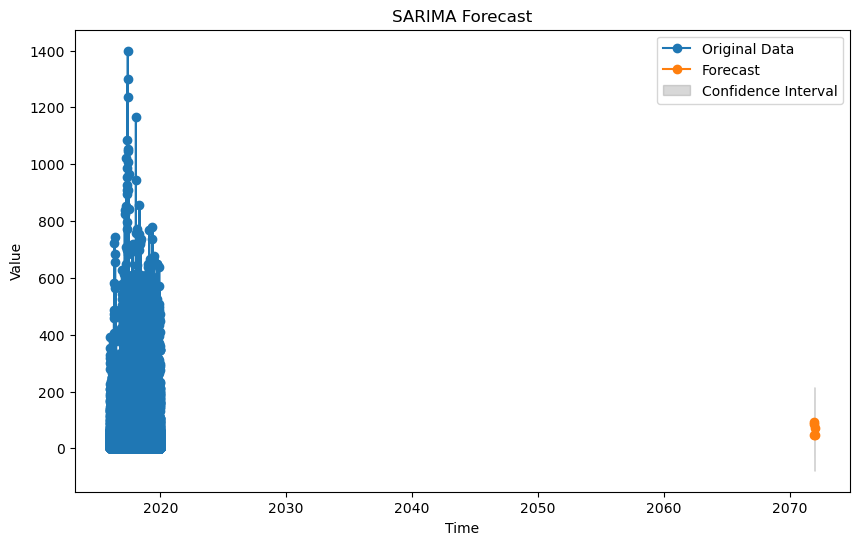

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 4)

model = SARIMAX(s_df["Qty_Sold"], order=order, seasonal_order=seasonal_order)
results = model.fit()

forecast_periods = 5
forecast = results.get_forecast(steps=forecast_periods)


forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(s_df['Qty_Sold'], label='Original Data', marker='o')
plt.plot(forecast_values, label='Forecast', marker='o')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


In [54]:
forecast_values

37245    84.602082
37246    91.236396
37247    47.772052
37248    48.688302
37249    69.972794
Name: predicted_mean, dtype: float64

# Seasonal Data - Automation

# Auto TimeSeries(Auto TS)

In [55]:
!pip install auto-ts --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for pyyaml: filename=PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl size=155374 sha256=4d348e30a5fcc426d0fb8f3371bb02ad252234a4d573e786622ecc5102da25e1
  Stored in directory: /root/.cache/pip/wheels/c7/0d/22/696ee92245ad710f506eee79bb05c740d8abccd3ecdb778683
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jup

In [56]:
s_df.head()

Sales_Value  rolling_mean_Qty  Seasonal_Difference_Qty  \
Transaction_Date                                                           
2017-06-16               44.1         28.732788                 0.032955   
2017-06-17               49.0         28.732788                 0.032955   
2017-06-18               93.1         28.732788                 0.032955   
2017-06-20                0.0         28.732788                 0.032955   
2017-06-26                0.0         28.732788                 0.032955   

                  SubCategory  Qty_Sold  
Transaction_Date                         
2017-06-16                  1       1.0  
2017-06-17                  1       1.0  
2017-06-18                  1       2.0  
2017-06-20                  1       0.0  
2017-06-26                  1       0.0

In [57]:
# Assuming your data is stored in a DataFrame called 'df'
s_df.reset_index(inplace=True)
s_df.rename(columns={'index': 'Transaction_Date'}, inplace=True)

In [58]:
s_df.head()

Transaction_Date  Sales_Value  rolling_mean_Qty  Seasonal_Difference_Qty  \
0       2017-06-16         44.1         28.732788                 0.032955   
1       2017-06-17         49.0         28.732788                 0.032955   
2       2017-06-18         93.1         28.732788                 0.032955   
3       2017-06-20          0.0         28.732788                 0.032955   
4       2017-06-26          0.0         28.732788                 0.032955   

   SubCategory  Qty_Sold  
0            1       1.0  
1            1       1.0  
2            1       2.0  
3            1       0.0  
4            1       0.0

In [59]:
s_df["Qty_Sold"]

0          1.0
1          1.0
2          2.0
3          0.0
4          0.0
         ...  
37240     12.0
37241    212.0
37242    198.0
37243     13.0
37244     11.0
Name: Qty_Sold, Length: 37245, dtype: float64

In [60]:
qty_sold_series = s_df["Qty_Sold"]
# Using sum() method
num_zeros_sum = (qty_sold_series == 0).sum()
print("Number of 0 values using sum():", num_zeros_sum)

Number of 0 values using sum(): 3740


In [61]:
# Assuming your data is stored in a DataFrame called 'data'
ts_data = s_df[['Transaction_Date', 'Qty_Sold']].rename(columns={'Transaction_Date': 'date', 'Qty_Sold': 'target'})

Imported auto_timeseries version:0.0.71. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')

Start of Fit.....
    Target variable given as = target
Start of loading of data.....
    Inputs: ts_column = date, sep = ,, target = ['target']
    Using given input: pandas dataframe...
    date column exists in given train data...
    train data shape = (37245, 1)
Alert: Could not detect strf_time_format of date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


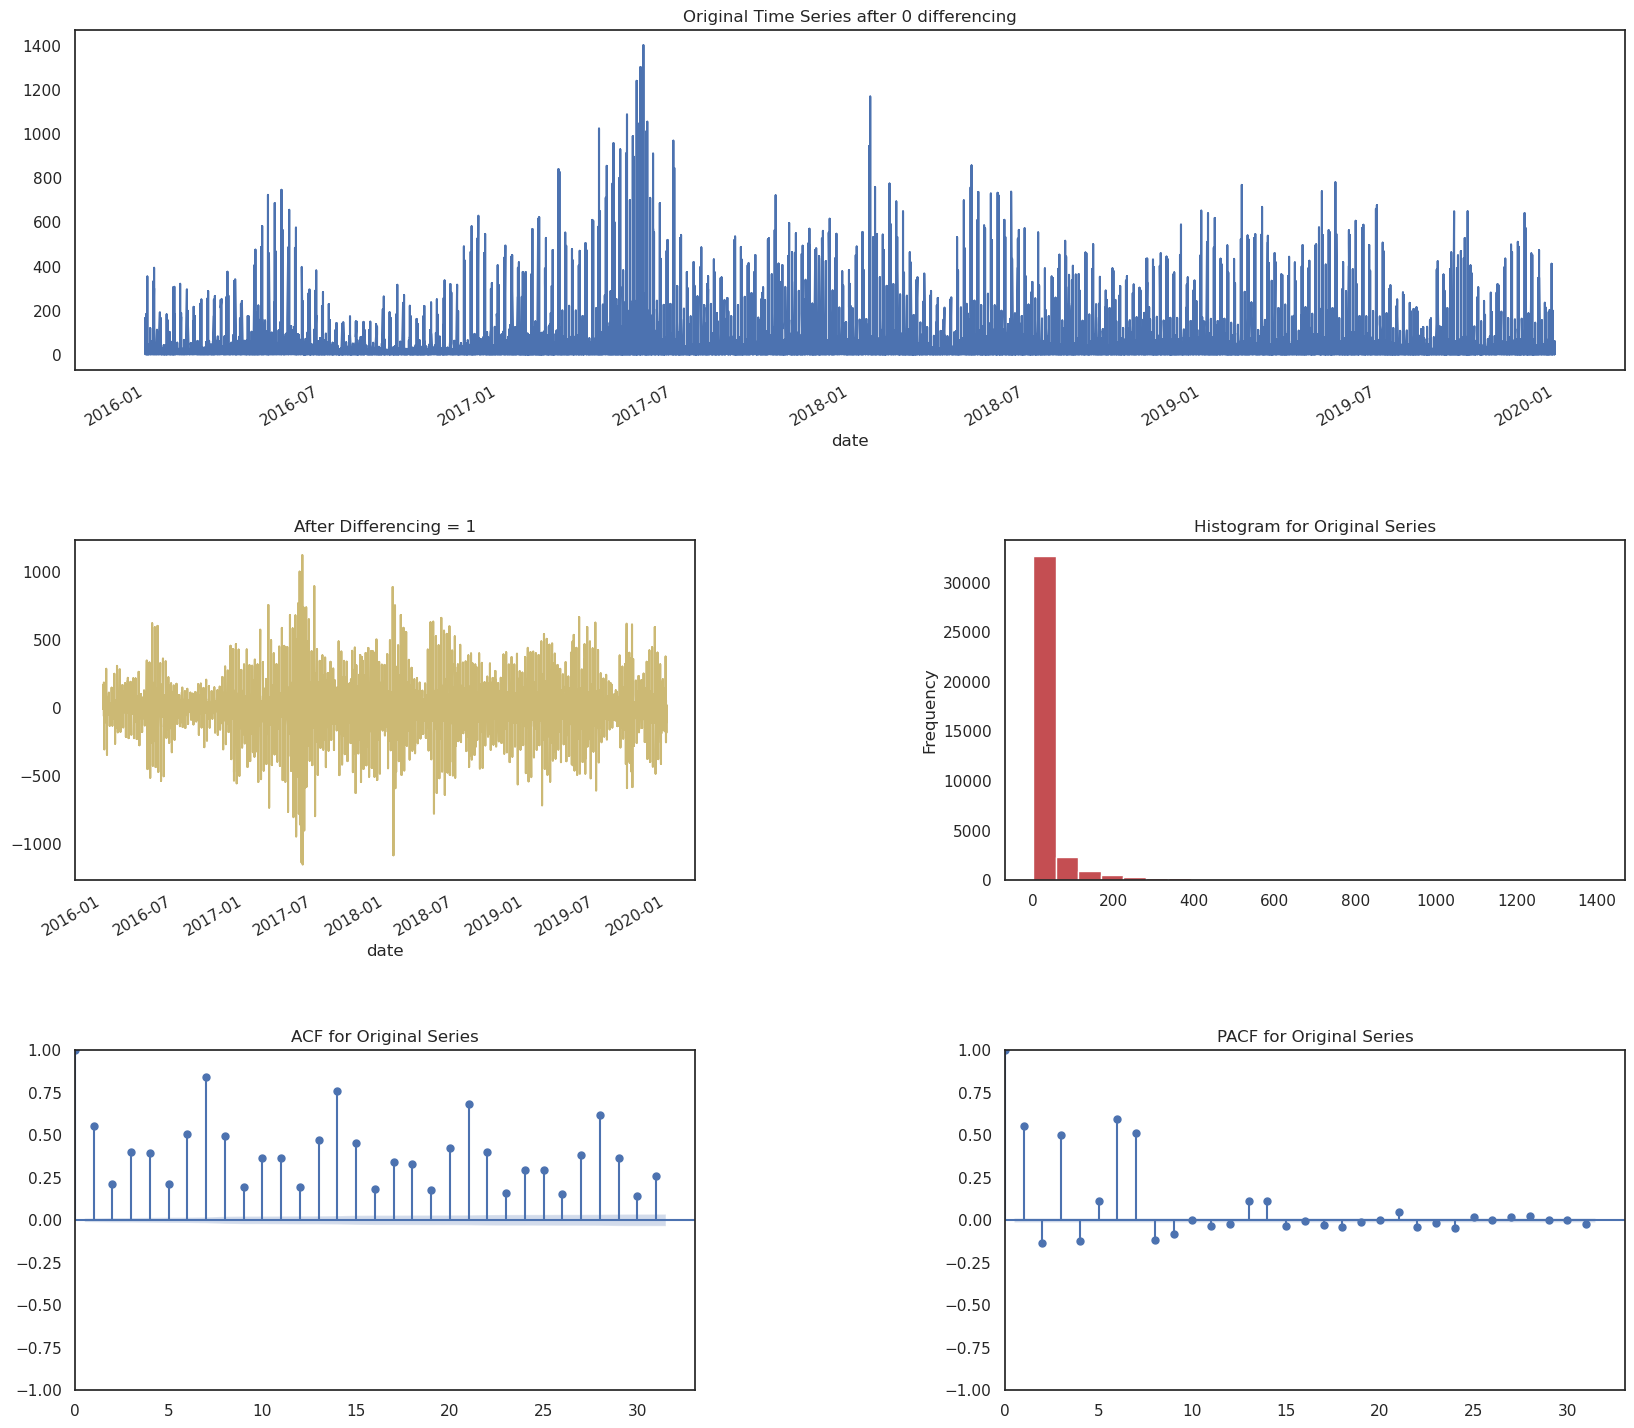

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(37245, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 37220 Test Shape: 5


02:08:58 - cmdstanpy - INFO - Chain [1] start processing
02:09:01 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 34.16
    Std Deviation of actuals = 21.74
    Normalized RMSE (as pct of std dev) = 157%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 37225 Test Shape: 5


02:09:05 - cmdstanpy - INFO - Chain [1] start processing
02:09:08 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 60.72
    Std Deviation of actuals = 73.07
    Normalized RMSE (as pct of std dev) = 83%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 37230 Test Shape: 5


02:09:12 - cmdstanpy - INFO - Chain [1] start processing
02:09:15 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 83.25
    Std Deviation of actuals = 83.69
    Normalized RMSE (as pct of std dev) = 99%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 37235 Test Shape: 5


02:09:19 - cmdstanpy - INFO - Chain [1] start processing
02:09:22 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 125.95
    Std Deviation of actuals = 79.85
    Normalized RMSE (as pct of std dev) = 158%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 37240 Test Shape: 5


02:09:26 - cmdstanpy - INFO - Chain [1] start processing
02:09:29 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 116.13
    Std Deviation of actuals = 94.66
    Normalized RMSE (as pct of std dev) = 123%
Cross Validation window: 5 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 58.66
    MSE (Mean Squared Error = 8226.47
    MAPE (Mean Absolute Percent Error) = inf%
    RMSE (Root Mean Squared Error) = 90.6999
    Normalized RMSE (MinMax) = 40%
    Normalized RMSE (as Std Dev of Actuals)= 110%
Time Taken = 36 seconds


02:09:34 - cmdstanpy - INFO - Chain [1] start processing
02:09:36 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building VAR Model - best suited for small datasets < 1000 rows and < 10 columns



No VAR model created since no explanatory variables given in data set


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####

Fitting ML model
    11 variables used in training ML model = ['target(t-1)', 'date_hour', 'date_minute', 'date_dayofweek', 'date_quarter', 'date_month', 'date_year', 'date_dayofyear', 'date_dayofmonth', 'date_weekofyear', 'date_weekend']

Running Cross Validation using XGBoost model..
    Max. iterations using expanding window cross validation = 2
train fold shape (33519, 11), test fold shape = (3725, 11)
### Number of booster rounds = 250 for XGBoost wh

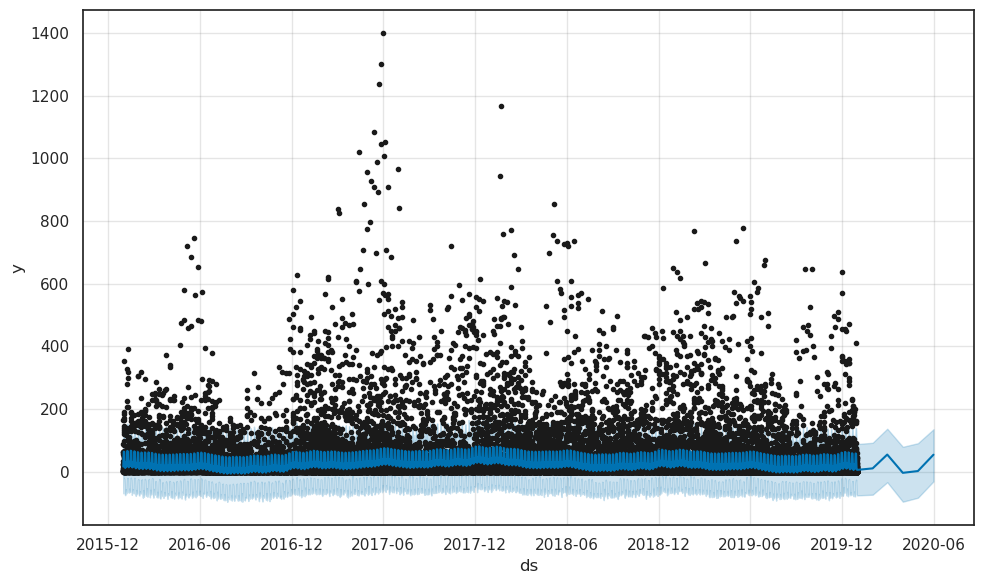

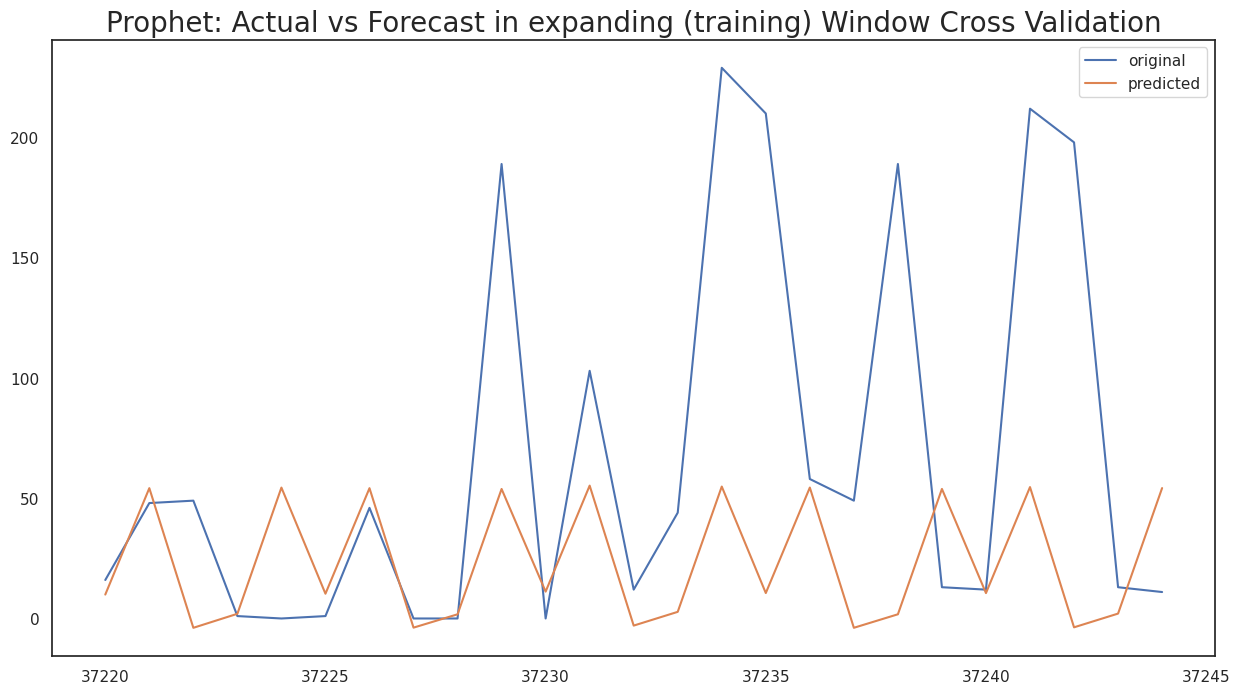

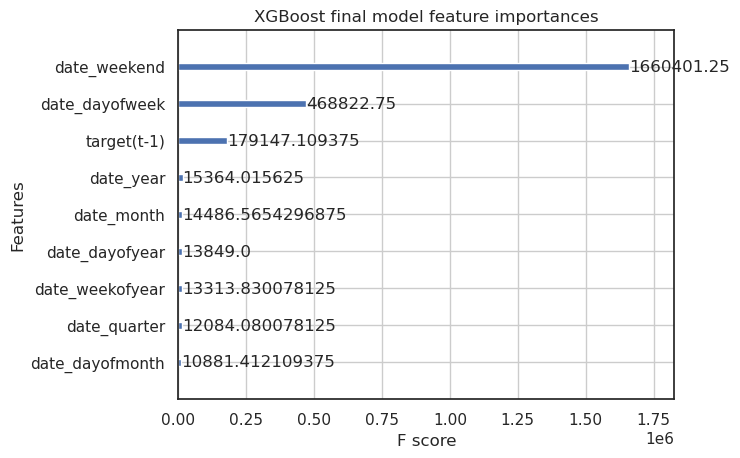

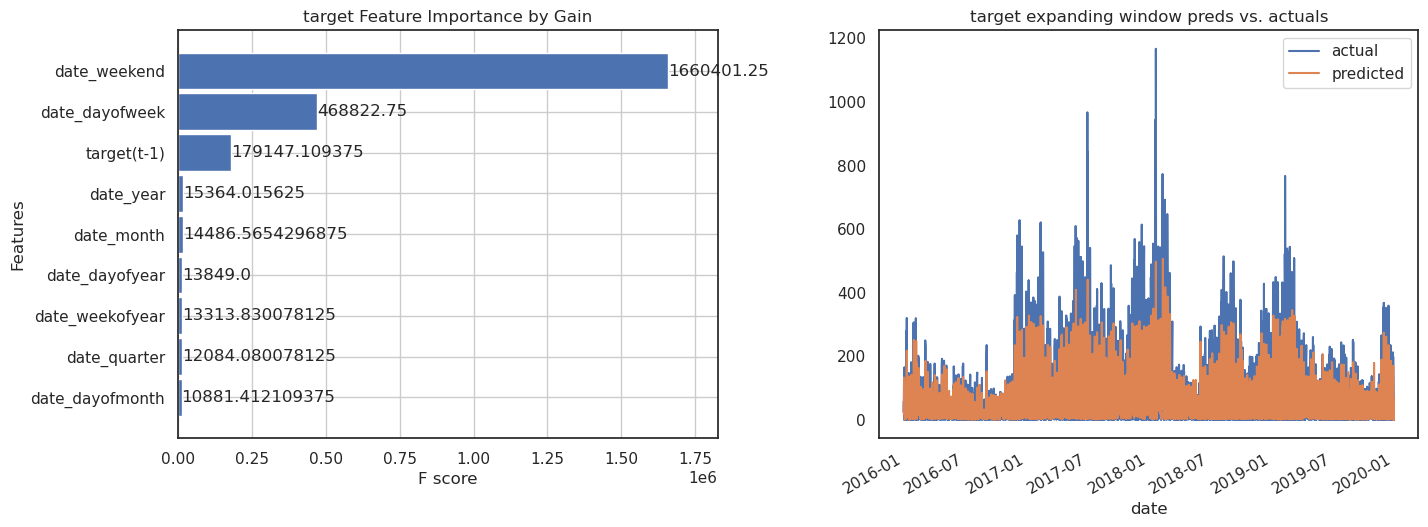

In [62]:
from auto_ts import auto_timeseries

# Assuming you have the time series data in a pandas DataFrame called "ts_data"
# with the date column named "date" and the target column named "target"

# Step 4: Use auto_timeseries to create and fit the model
model = auto_timeseries(
    score_type='rmse',
    time_interval='M',  # Adjust the time interval accordingly
    non_seasonal_pdq=None,
    seasonality=True,
    seasonal_period=12,
    model_type=['prophet','VAR','ML'],  # Include SARIMA and LSTM models
    verbose=2
)

# Step 5: Fit the model on the data
model.fit(ts_data, 'date', 'target')  # Change forecast_period to the desired number of forecasts


# Prediction

In [63]:
# Assuming your test data is stored in a DataFrame called 'test_data'
future_dates = pd.DataFrame({'date': pd.date_range(start='2019-11-13', periods=365, freq='M')})
forecast = model.predict(future_dates)

Predicting using test dataframe shape = (365, 1) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for date. Provide strf_time format during "setup" for better results.
ML predictions completed


In [64]:
forecast

yhat  mean_se  mean_ci_lower  mean_ci_upper
date                                                        
2019-11-30  62.981209      NaN            NaN            NaN
2019-12-31  40.805325      NaN            NaN            NaN
2020-01-31  38.072334      NaN            NaN            NaN
2020-02-29  99.006836      NaN            NaN            NaN
2020-03-31  50.445408      NaN            NaN            NaN
...               ...      ...            ...            ...
2049-11-30  33.598961      NaN            NaN            NaN
2049-12-31  33.136765      NaN            NaN            NaN
2050-01-31  25.406710      NaN            NaN            NaN
2050-02-28  12.589923      NaN            NaN            NaN
2050-03-31  10.287262      NaN            NaN            NaN

[365 rows x 4 columns]

# Non Seasonal Data

In [65]:
# Extracting Seasonal data from the original data
ns_df = df[df['Seasonality']=='Non Seasonal']
ns_df = ns_df.drop(["Seasonality"],axis =1)

In [66]:
ns_df.head()

Product_ID Transaction_Date  Sales_Value  Qty_Sold  Total_Transactions  \
56      100702       2016-01-01        64.26      1.19                 0.0   
57      100702       2016-01-02       293.76      5.44                 0.0   
58      100702       2016-01-03       205.74      3.81                 0.0   
59      100702       2016-01-04       167.40      3.10                 0.0   
60      100702       2016-01-05       153.36      2.84                 0.0   

    Wastage_QTY  Wastage_Value Product_Description   Category SubCategory  \
56          0.0            0.0                Amla  Vegetable        Amla   
57          0.0            0.0                Amla  Vegetable        Amla   
58          0.0            0.0                Amla  Vegetable        Amla   
59          0.0            0.0                Amla  Vegetable        Amla   
60          0.0            0.0                Amla  Vegetable        Amla   

    Shelf Life in days  
56                   5  
57                   5  
58                   5  
59                   5  
60                   5

In [67]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147267 entries, 56 to 184511
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Product_ID           147267 non-null  int64  
 1   Transaction_Date     147267 non-null  object 
 2   Sales_Value          147267 non-null  float64
 3   Qty_Sold             147267 non-null  float64
 4   Total_Transactions   147267 non-null  float64
 5   Wastage_QTY          147267 non-null  float64
 6   Wastage_Value        147267 non-null  float64
 7   Product_Description  147267 non-null  object 
 8   Category             147267 non-null  object 
 9   SubCategory          147267 non-null  object 
 10  Shelf Life in days   147267 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 13.5+ MB


In [68]:
ns_df.index = pd.to_datetime(ns_df['Transaction_Date'])

# Non Seasonal Data- Feature Engineering & Feature Selection

In [69]:
# Convert the date column to datetime data type
ns_df["Transaction_Date"] = pd.to_datetime(ns_df["Transaction_Date"])

# Extract month and day into separate columns
ns_df["Day"] = ns_df["Transaction_Date"].dt.day

#removing the transaction date
ns_df.drop(['Transaction_Date'],axis=1,inplace=True)

In [70]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147267 entries, 2016-01-01 to 2019-11-12
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Product_ID           147267 non-null  int64  
 1   Sales_Value          147267 non-null  float64
 2   Qty_Sold             147267 non-null  float64
 3   Total_Transactions   147267 non-null  float64
 4   Wastage_QTY          147267 non-null  float64
 5   Wastage_Value        147267 non-null  float64
 6   Product_Description  147267 non-null  object 
 7   Category             147267 non-null  object 
 8   SubCategory          147267 non-null  object 
 9   Shelf Life in days   147267 non-null  int64  
 10  Day                  147267 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 13.5+ MB


In [71]:
ns_df.head()

Product_ID  Sales_Value  Qty_Sold  Total_Transactions  \
Transaction_Date                                                          
2016-01-01            100702        64.26      1.19                 0.0   
2016-01-02            100702       293.76      5.44                 0.0   
2016-01-03            100702       205.74      3.81                 0.0   
2016-01-04            100702       167.40      3.10                 0.0   
2016-01-05            100702       153.36      2.84                 0.0   

                  Wastage_QTY  Wastage_Value Product_Description   Category  \
Transaction_Date                                                              
2016-01-01                0.0            0.0                Amla  Vegetable   
2016-01-02                0.0            0.0                Amla  Vegetable   
2016-01-03                0.0            0.0                Amla  Vegetable   
2016-01-04                0.0            0.0                Amla  Vegetable   
2016-01-05                0.0            0.0                Amla  Vegetable   

                 SubCategory  Shelf Life in days  Day  
Transaction_Date                                       
2016-01-01              Amla                   5    1  
2016-01-02              Amla                   5    2  
2016-01-03              Amla                   5    3  
2016-01-04              Amla                   5    4  
2016-01-05              Amla                   5    5

In [72]:
# Month and Day of Week Features
ns_df['month'] = ns_df.index.month
ns_df['day_of_week'] = ns_df.index.dayofweek

<Axes: xlabel='Transaction_Date'>

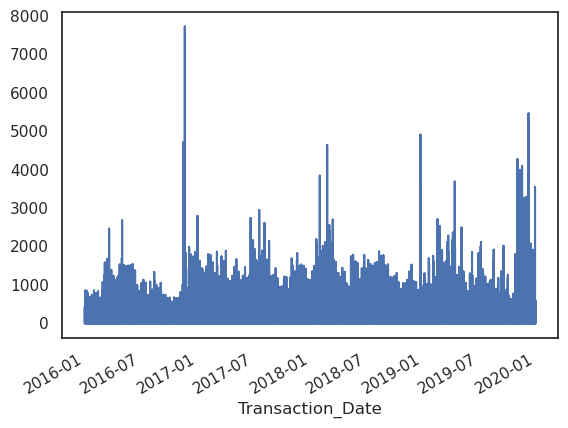

In [73]:
ns_df["Qty_Sold"].plot(kind='line')

In [74]:
ns_df.head()

Product_ID  Sales_Value  Qty_Sold  Total_Transactions  \
Transaction_Date                                                          
2016-01-01            100702        64.26      1.19                 0.0   
2016-01-02            100702       293.76      5.44                 0.0   
2016-01-03            100702       205.74      3.81                 0.0   
2016-01-04            100702       167.40      3.10                 0.0   
2016-01-05            100702       153.36      2.84                 0.0   

                  Wastage_QTY  Wastage_Value Product_Description   Category  \
Transaction_Date                                                              
2016-01-01                0.0            0.0                Amla  Vegetable   
2016-01-02                0.0            0.0                Amla  Vegetable   
2016-01-03                0.0            0.0                Amla  Vegetable   
2016-01-04                0.0            0.0                Amla  Vegetable   
2016-01-05                0.0            0.0                Amla  Vegetable   

                 SubCategory  Shelf Life in days  Day  month  day_of_week  
Transaction_Date                                                           
2016-01-01              Amla                   5    1      1            4  
2016-01-02              Amla                   5    2      1            5  
2016-01-03              Amla                   5    3      1            6  
2016-01-04              Amla                   5    4      1            0  
2016-01-05              Amla                   5    5      1            1

# Non Seasonal Data -Model Building & Model Evaluation

# ARIMA

In [75]:
from statsmodels.tsa.arima.model import ARIMA

In [76]:
model = ARIMA(ns_df["Qty_Sold"],order=(1,1,1))
model_fit = model.fit()

In [77]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Qty_Sold   No. Observations:               147267
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -878500.329
Date:                Sat, 29 Jul 2023   AIC                        1757006.658
Time:                        02:10:35   BIC                        1757036.358
Sample:                             0   HQIC                       1757015.517
                             - 147267                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2762      0.000    946.506      0.000       0.276       0.277
ma.L1         -0.9614      0.000  -7065.751      0.000      -0.962      -0.961
sigma2      8892.7496      2.518   3532.213      0.000    8887.815    8897.684
===================================================================================
Ljung-Box (L1) (Q):                1612.71   Jarque-Bera (JB):        1028285320.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.77   Skew:                            10.45
Prob(H) (two-sided):                  0.00   Kurtosis:                       411.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
ns_df["Forecast"] = model_fit.predict(start = 100,end = 1000,dynamic = True)

In [79]:
import multiprocessing as mp
mp.cpu_count()

4

In [80]:
n = 3
pool = mp.Pool(processes = n)
results = model.fit()
pool.close()
pool.join()

In [81]:
ns_df["Forecast"] = results.predict(start = 0,end = 1000,dynamic = True)

<Axes: xlabel='Transaction_Date'>

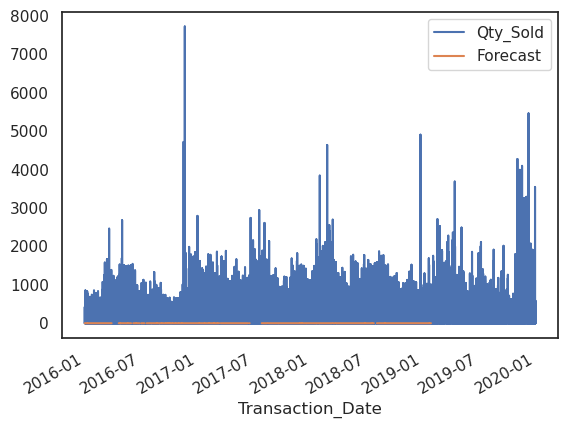

In [82]:
ns_df[["Qty_Sold","Forecast"]].plot(kind="line")

In [83]:
ns_df.head()

Product_ID  Sales_Value  Qty_Sold  Total_Transactions  \
Transaction_Date                                                          
2016-01-01            100702        64.26      1.19                 0.0   
2016-01-02            100702       293.76      5.44                 0.0   
2016-01-03            100702       205.74      3.81                 0.0   
2016-01-04            100702       167.40      3.10                 0.0   
2016-01-05            100702       153.36      2.84                 0.0   

                  Wastage_QTY  Wastage_Value Product_Description   Category  \
Transaction_Date                                                              
2016-01-01                0.0            0.0                Amla  Vegetable   
2016-01-02                0.0            0.0                Amla  Vegetable   
2016-01-03                0.0            0.0                Amla  Vegetable   
2016-01-04                0.0            0.0                Amla  Vegetable   
2016-01-05                0.0            0.0                Amla  Vegetable   

                 SubCategory  Shelf Life in days  Day  month  day_of_week  \
Transaction_Date                                                            
2016-01-01              Amla                   5    1      1            4   
2016-01-02              Amla                   5    2      1            5   
2016-01-03              Amla                   5    3      1            6   
2016-01-04              Amla                   5    4      1            0   
2016-01-05              Amla                   5    5      1            1   

                  Forecast  
Transaction_Date            
2016-01-01             0.0  
2016-01-02             0.0  
2016-01-03             0.0  
2016-01-04             0.0  
2016-01-05             0.0

# RandomForestRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
ns_df.drop(columns=["Category", "SubCategory", "Product_Description"], inplace=True)

In [86]:
X = ns_df.drop(["Qty_Sold","Forecast"],axis=1).values
y = ns_df["Qty_Sold"].values

In [87]:
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [88]:
y_pred = model.predict(X)
y_pred

array([1.2016 , 5.33914, 3.8051 , ..., 0.35468, 0.     , 0.     ])

In [89]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
loss = mean_squared_error(y,y_pred)
print(f'mse: {loss/100}')
loss1 = mean_squared_log_error(y,y_pred)
print(f'msle :{loss1}')
print(f'rmse :{np.sqrt(loss/100)}')

mse: 2.9936103284892193
msle :0.011972215148922513
rmse :1.730205285071462


In [90]:
ns_df.head()

Product_ID  Sales_Value  Qty_Sold  Total_Transactions  \
Transaction_Date                                                          
2016-01-01            100702        64.26      1.19                 0.0   
2016-01-02            100702       293.76      5.44                 0.0   
2016-01-03            100702       205.74      3.81                 0.0   
2016-01-04            100702       167.40      3.10                 0.0   
2016-01-05            100702       153.36      2.84                 0.0   

                  Wastage_QTY  Wastage_Value  Shelf Life in days  Day  month  \
Transaction_Date                                                               
2016-01-01                0.0            0.0                   5    1      1   
2016-01-02                0.0            0.0                   5    2      1   
2016-01-03                0.0            0.0                   5    3      1   
2016-01-04                0.0            0.0                   5    4      1   
2016-01-05                0.0            0.0                   5    5      1   

                  day_of_week  Forecast  
Transaction_Date                         
2016-01-01                  4       0.0  
2016-01-02                  5       0.0  
2016-01-03                  6       0.0  
2016-01-04                  0       0.0  
2016-01-05                  1       0.0

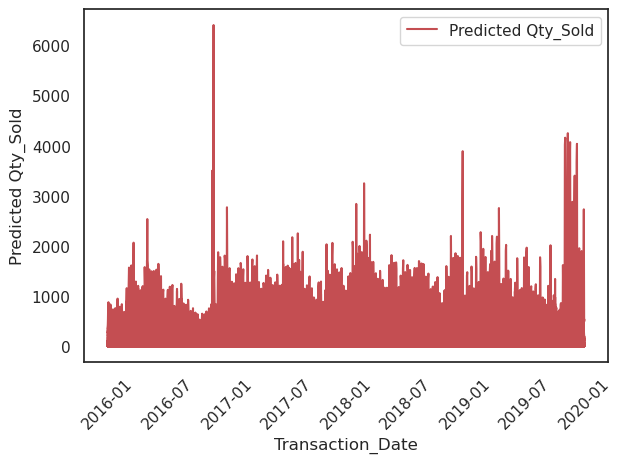

In [91]:
plt.plot(ns_df.index, y_pred, color="r", label='Predicted Qty_Sold')
plt.xlabel('Transaction_Date')
plt.ylabel('Predicted Qty_Sold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

# Non Seasonal Data Automation

In [92]:
from auto_ts import auto_timeseries

In [93]:
ns_df

Product_ID  Sales_Value  Qty_Sold  Total_Transactions  \
Transaction_Date                                                          
2016-01-01            100702       64.260     1.190                 0.0   
2016-01-02            100702      293.760     5.440                 0.0   
2016-01-03            100702      205.740     3.810                 0.0   
2016-01-04            100702      167.400     3.100                 0.0   
2016-01-05            100702      153.360     2.840                 0.0   
...                      ...          ...       ...                 ...   
2019-11-03            101200       28.906     0.194               975.0   
2019-11-05            101200        0.000     0.000               314.0   
2019-11-06            101200       46.637     0.313               605.0   
2019-11-09            101200        0.000     0.000              1024.0   
2019-11-12            101200        0.000     0.000               290.0   

                  Wastage_QTY  Wastage_Value  Shelf Life in days  Day  month  \
Transaction_Date                                                               
2016-01-01              0.000         0.0000                   5    1      1   
2016-01-02              0.000         0.0000                   5    2      1   
2016-01-03              0.000         0.0000                   5    3      1   
2016-01-04              0.000         0.0000                   5    4      1   
2016-01-05              0.000         0.0000                   5    5      1   
...                       ...            ...                 ...  ...    ...   
2019-11-03              0.000         0.0000                   5    3     11   
2019-11-05             -1.298       -92.7482                   5    5     11   
2019-11-06              0.000         0.0000                   5    6     11   
2019-11-09             -4.200      -300.1097                   5    9     11   
2019-11-12             -3.487      -249.1625                   5   12     11   

                  day_of_week  Forecast  
Transaction_Date                         
2016-01-01                  4       0.0  
2016-01-02                  5       0.0  
2016-01-03                  6       0.0  
2016-01-04                  0       0.0  
2016-01-05                  1       0.0  
...                       ...       ...  
2019-11-03                  6       NaN  
2019-11-05                  1       NaN  
2019-11-06                  2       NaN  
2019-11-09                  5       NaN  
2019-11-12                  1       NaN  

[147267 rows x 11 columns]

In [94]:
# Assuming your data is stored in a DataFrame called 'df'
ns_df.reset_index(inplace=True)

In [95]:
ns_df.rename(columns={'index': 'Transaction_Date'}, inplace=True)

In [96]:
ns_df.head()

Transaction_Date  Product_ID  Sales_Value  Qty_Sold  Total_Transactions  \
0       2016-01-01      100702        64.26      1.19                 0.0   
1       2016-01-02      100702       293.76      5.44                 0.0   
2       2016-01-03      100702       205.74      3.81                 0.0   
3       2016-01-04      100702       167.40      3.10                 0.0   
4       2016-01-05      100702       153.36      2.84                 0.0   

   Wastage_QTY  Wastage_Value  Shelf Life in days  Day  month  day_of_week  \
0          0.0            0.0                   5    1      1            4   
1          0.0            0.0                   5    2      1            5   
2          0.0            0.0                   5    3      1            6   
3          0.0            0.0                   5    4      1            0   
4          0.0            0.0                   5    5      1            1   

   Forecast  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [97]:
# Assuming your data is stored in a DataFrame called 'data'

ts_data = ns_df[['Transaction_Date', 'Qty_Sold']].rename(columns={'Transaction_Date': 'date', 'Qty_Sold': 'target'})


Start of Fit.....
    Target variable given as = target
Start of loading of data.....
    Inputs: ts_column = date, sep = ,, target = ['target']
    Using given input: pandas dataframe...
    date column exists in given train data...
    train data shape = (147267, 1)
Alert: Could not detect strf_time_format of date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


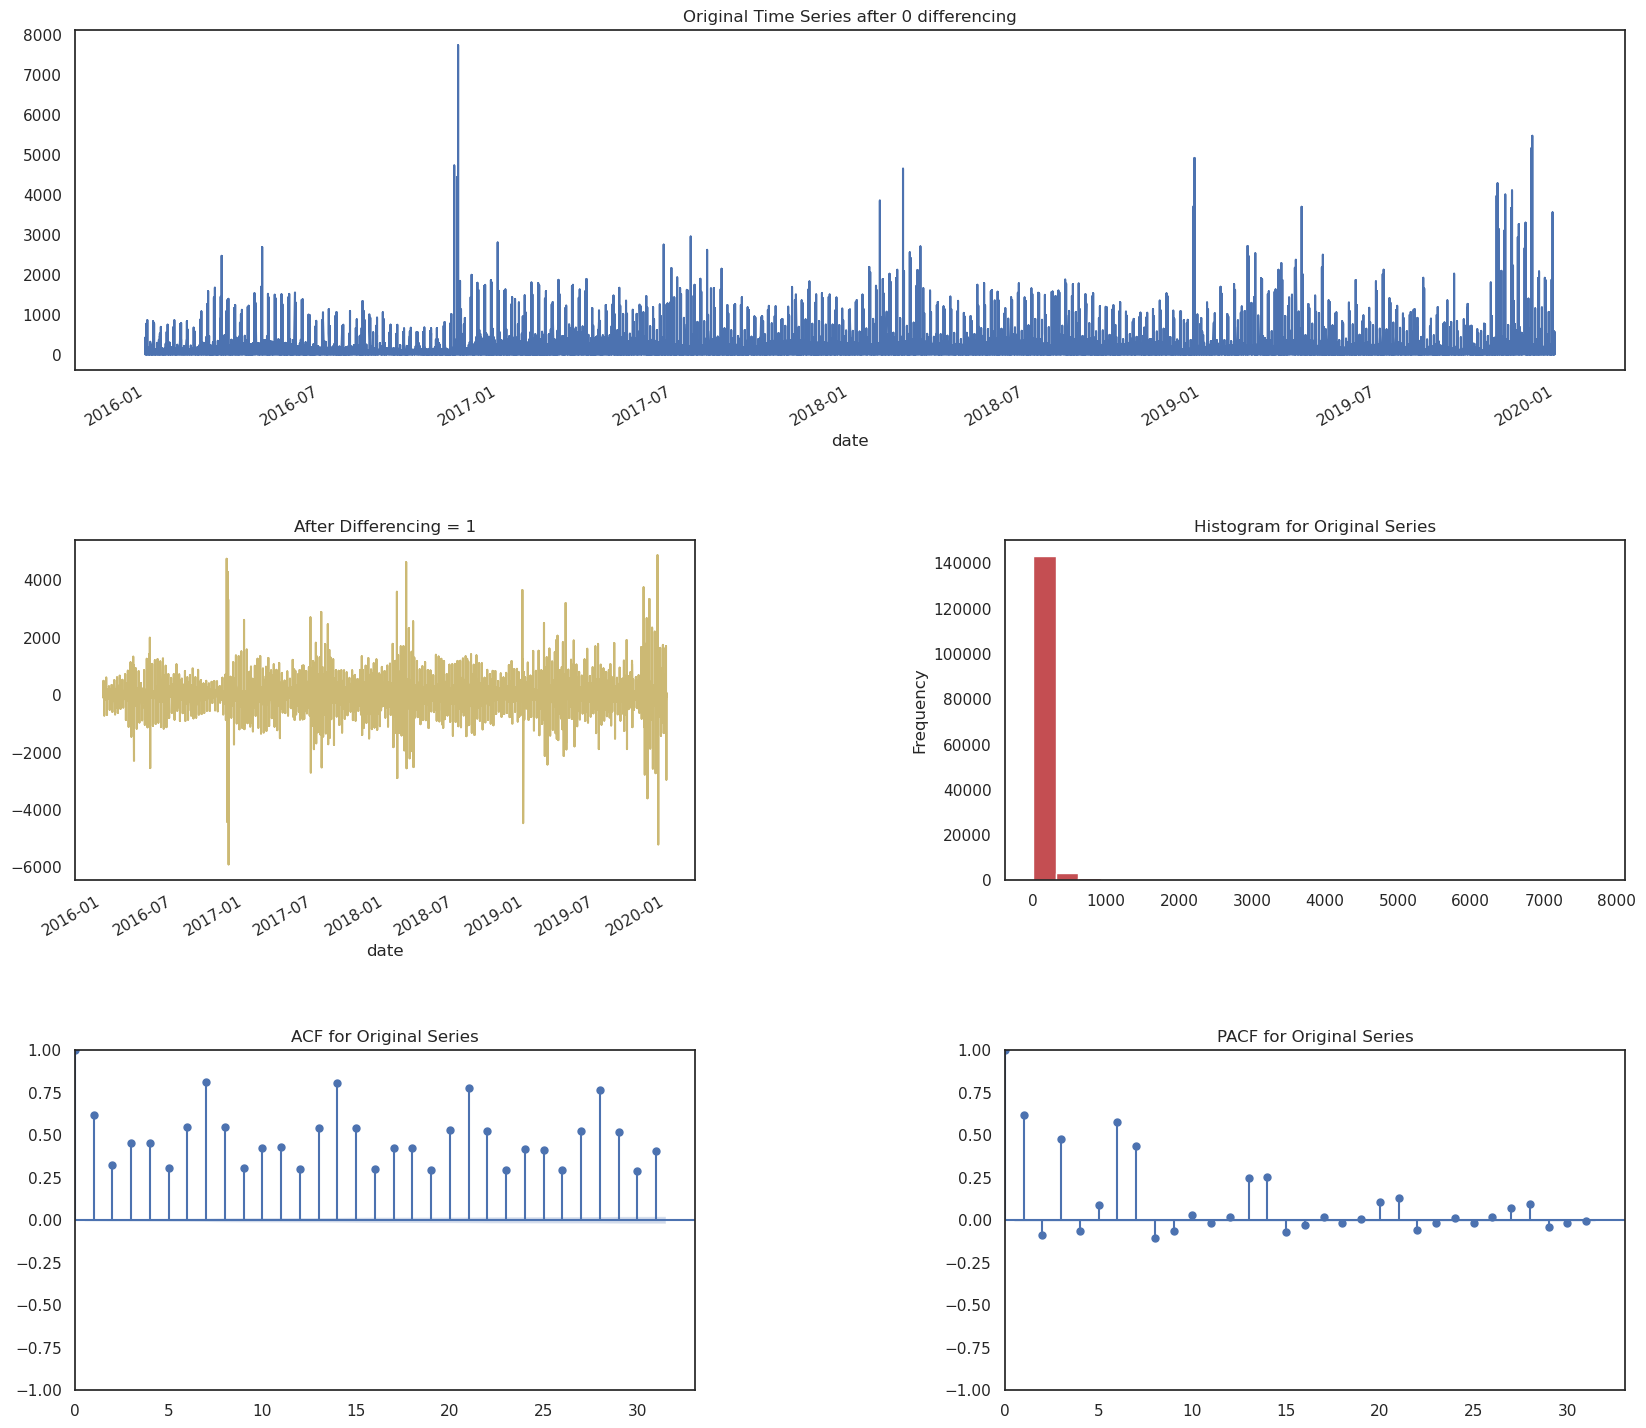

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(147267, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 147242 Test Shape: 5


02:13:57 - cmdstanpy - INFO - Chain [1] start processing
02:14:08 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 62.04
    Std Deviation of actuals = 0.49
    Normalized RMSE (as pct of std dev) = 12713%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 147247 Test Shape: 5


02:14:23 - cmdstanpy - INFO - Chain [1] start processing
02:14:34 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 64.24
    Std Deviation of actuals = 0.11
    Normalized RMSE (as pct of std dev) = 60990%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 147252 Test Shape: 5


02:14:49 - cmdstanpy - INFO - Chain [1] start processing
02:14:59 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 59.70
    Std Deviation of actuals = 0.27
    Normalized RMSE (as pct of std dev) = 21874%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 147257 Test Shape: 5


02:15:14 - cmdstanpy - INFO - Chain [1] start processing
02:15:25 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 63.01
    Std Deviation of actuals = 0.53
    Normalized RMSE (as pct of std dev) = 11886%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 147262 Test Shape: 5


02:15:39 - cmdstanpy - INFO - Chain [1] start processing
02:15:51 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 61.96
    Std Deviation of actuals = 0.13
    Normalized RMSE (as pct of std dev) = 47751%
Cross Validation window: 5 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 50.53
    MSE (Mean Squared Error = 3870.07
    MAPE (Mean Absolute Percent Error) = inf%
    RMSE (Root Mean Squared Error) = 62.2099
    Normalized RMSE (MinMax) = 4136%
    Normalized RMSE (as Std Dev of Actuals)= 15778%
Time Taken = 128 seconds


02:16:06 - cmdstanpy - INFO - Chain [1] start processing
02:16:17 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building VAR Model - best suited for small datasets < 1000 rows and < 10 columns



No VAR model created since no explanatory variables given in data set


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####

Fitting ML model
    11 variables used in training ML model = ['target(t-1)', 'date_hour', 'date_minute', 'date_dayofweek', 'date_quarter', 'date_month', 'date_year', 'date_dayofyear', 'date_dayofmonth', 'date_weekofyear', 'date_weekend']

Running Cross Validation using XGBoost model..
    Max. iterations using expanding window cross validation = 2
train fold shape (132539, 11), test fold shape = (14727, 11)
### Number of booster rounds = 250 for XGBoost 

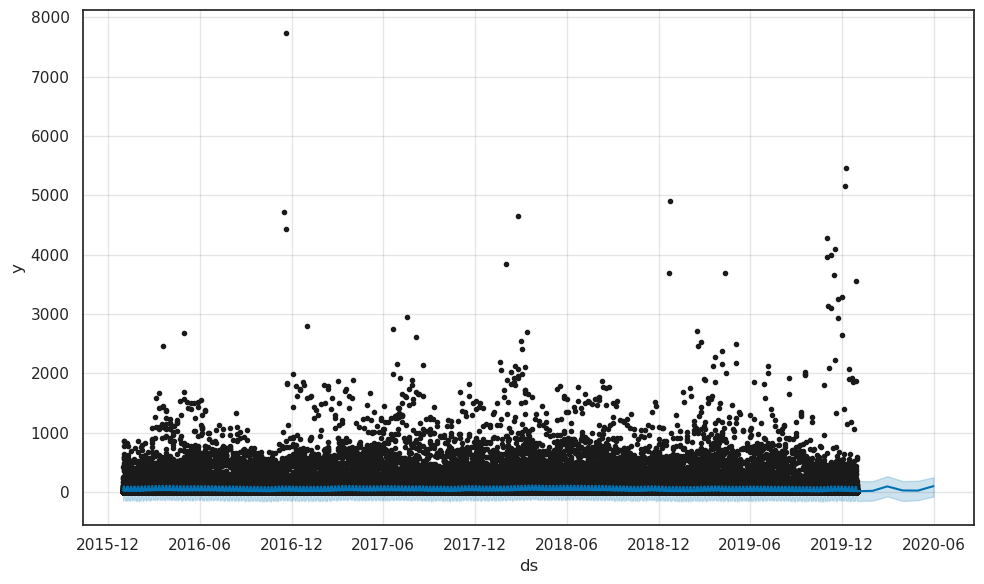

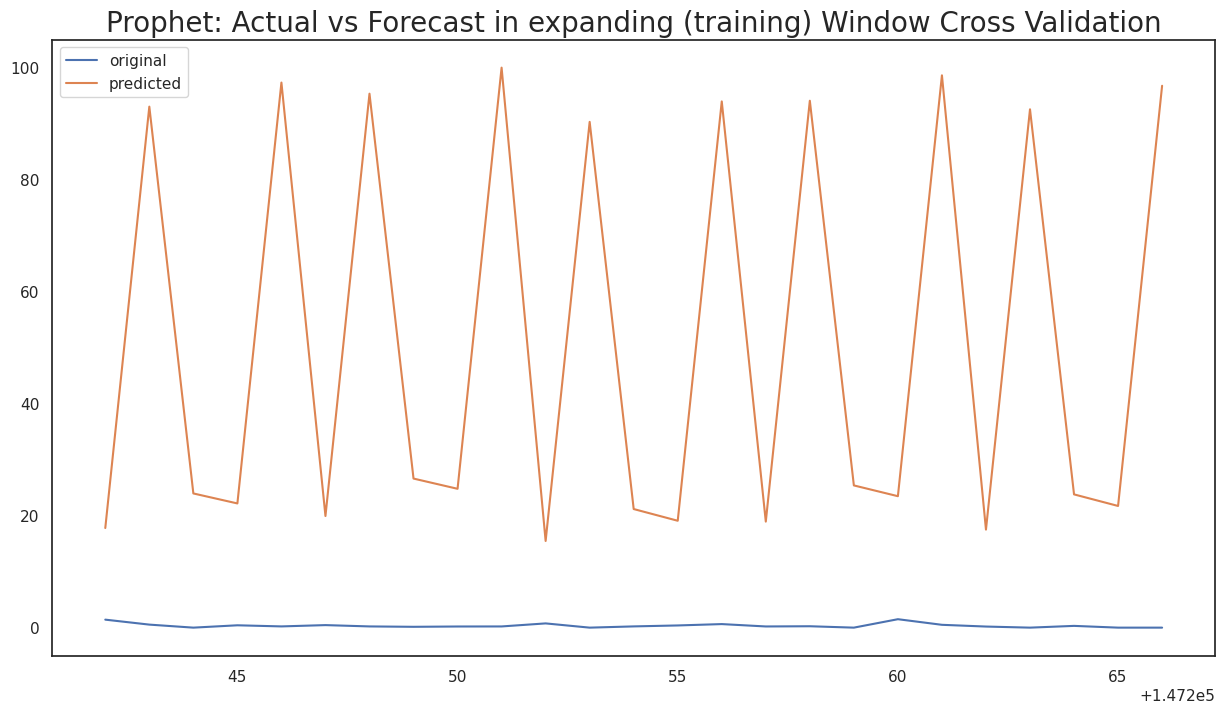

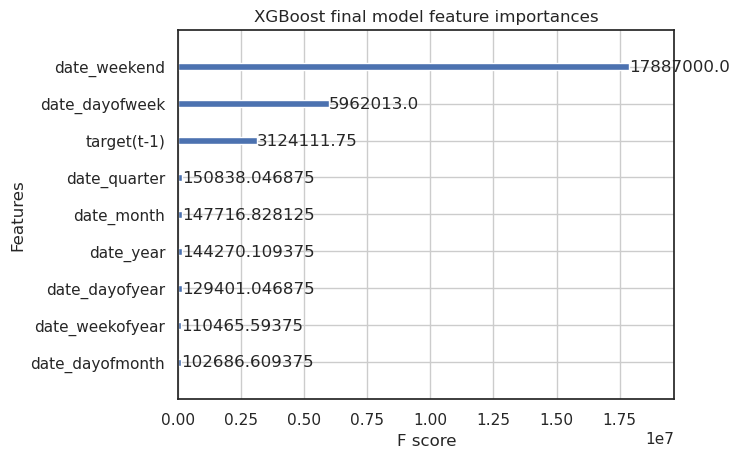

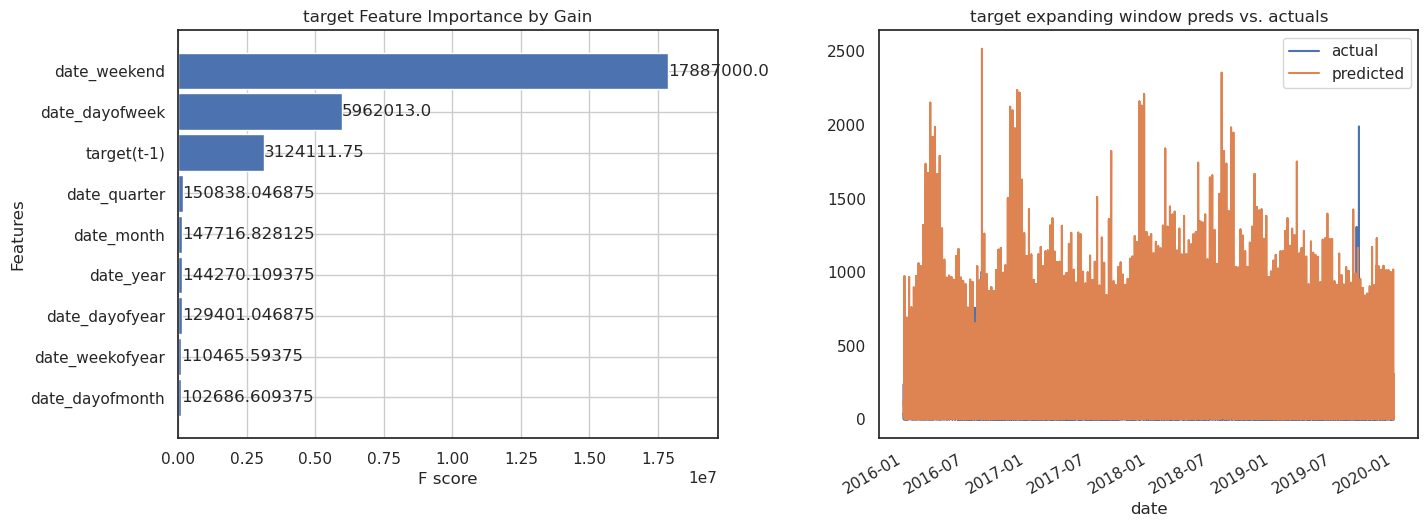

In [98]:
model = auto_timeseries(
    score_type='rmse',
    time_interval='M',  # If your data is daily, use 'Day', otherwise use 'Month', 'Year', etc.
    non_seasonal_pdq=None,
    seasonality=False,
    seasonal_period=12,
    model_type=['prophet', 'VAR', 'ML'],
    verbose=2
)

# Fit the model on the data
model.fit(ts_data, 'date', 'target')


# Prediction

In [99]:
# Assuming your test data is stored in a DataFrame called 'test_data'
future_dates = pd.DataFrame({'date': pd.date_range(start='2019-11-13', periods=365, freq='D')})
forecast = model.predict(future_dates)


Predicting using test dataframe as input for Prophet model
Building Forecast dataframe. Forecast Period = 365


In [100]:
forecast

ds       trend   yhat_lower   yhat_upper  trend_lower  \
1461 2020-01-31   42.531091  -143.531079   183.176982    42.362688   
1462 2020-02-29   43.028251   -64.717695   261.349333    42.450539   
1463 2020-03-31   43.559699  -135.425892   192.514302    42.282269   
1464 2020-04-30   44.074003  -140.841187   192.571975    41.971662   
1465 2020-05-31   44.605451   -67.055793   257.124320    41.439057   
...         ...         ...          ...          ...          ...   
1821 2050-01-31  230.389280 -1994.211072  2488.642914 -1977.976190   
1822 2050-02-28  230.869298 -2065.407148  2461.057986 -1986.375528   
1823 2050-03-31  231.400745 -2006.990861  2479.559826 -1991.956190   
1824 2050-04-30  231.915049 -1962.685243  2580.467783 -1997.652271   
1825 2050-05-31  232.446497 -2044.713247  2577.996611 -2003.591414   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1461    42.734924      -24.744899            -24.744899            -24.744899   
1462    43.708338       49.809476             49.809476             49.809476   
1463    44.979469      -19.476241            -19.476241            -19.476241   
1464    46.347869      -21.953603            -21.953603            -21.953603   
1465    47.781588       52.491741             52.491741             52.491741   
...           ...             ...                   ...                   ...   
1821  2503.908257      -26.229957            -26.229957            -26.229957   
1822  2514.339152      -18.650081            -18.650081            -18.650081   
1823  2523.797862      -15.914547            -15.914547            -15.914547   
1824  2531.599864       47.651821             47.651821             47.651821   
1825  2542.492003      -22.914179            -22.914179            -22.914179   

         weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
1461 -20.533975    -20.533975    -20.533975 -4.210923     -4.210923   
1462  46.243429     46.243429     46.243429  3.566047      3.566047   
1463 -26.824244    -26.824244    -26.824244  7.348004      7.348004   
1464 -23.352181    -23.352181    -23.352181  1.398578      1.398578   
1465  48.575531     48.575531     48.575531  3.916210      3.916210   
...         ...           ...           ...       ...           ...   
1821 -22.080415    -22.080415    -22.080415 -4.149541     -4.149541   
1822 -22.080415    -22.080415    -22.080415  3.430334      3.430334   
1823 -23.352181    -23.352181    -23.352181  7.437635      7.437635   
1824  46.243429     46.243429     46.243429  1.408392      1.408392   
1825 -26.824244    -26.824244    -26.824244  3.910065      3.910065   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1461     -4.210923                   0.0                         0.0   
1462      3.566047                   0.0                         0.0   
1463      7.348004                   0.0                         0.0   
1464      1.398578                   0.0                         0.0   
1465      3.916210                   0.0                         0.0   
...            ...                   ...                         ...   
1821     -4.149541                   0.0                         0.0   
1822      3.430334                   0.0                         0.0   
1823      7.437635                   0.0                         0.0   
1824      1.408392                   0.0                         0.0   
1825      3.910065                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1461                         0.0   17.786192  
1462                         0.0   92.837727  
1463                         0.0   24.083458  
1464                         0.0   22.120400  
1465                         0.0   97.097192  
...                          ...         ...  
1821                         0.0  204.159324  
1822                         0.0  212.219216  
1823                         0.0  215.486199  
1824       